## EXPLORATORY DATA ANALYSIS

In [1]:
# ========================================
# 1. Setup & Data Loading
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Increase display options for DataFrame
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

# Load the cleaned CSV
df = pd.read_csv("/Users/anovayoungers/Downloads/cleaned_movies.csv")

# Basic checks
print("Shape of DataFrame:", df.shape)
display(df.head(3))

# Let's see the current columns
print("Columns:", df.columns.tolist())

# Quick null count
print("\nMissing values per column:\n", df.isnull().sum())


Shape of DataFrame: (44907, 25)


,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,keywords,budget_missing,revenue_missing,runtime_missing
0,[],30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",0,0,0
1,[],65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",0,0,0
2,[],8000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,16838910.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",1,1,0


Columns: ['belongs_to_collection', 'budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'budget_missing', 'revenue_missing', 'runtime_missing']

Missing values per column:
 belongs_to_collection     0
budget                    0
genres                    0
id                        0
imdb_id                  12
                         ..
crew                      0
keywords                  0
budget_missing            0
revenue_missing           0
runtime_missing           0
Length: 25, dtype: int64


In [2]:
# ========================================
# 2. High-Level Numeric Summaries
# ========================================

# Identify numeric columns for quick reference
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Describe numeric columns
display(df[numeric_cols].describe())

# Correlation matrix
corr = df[numeric_cols].corr()

# We'll show the correlation values in a text display:
print("Correlation matrix:\n", corr)


Numeric columns: ['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'budget_missing', 'revenue_missing', 'runtime_missing']


,budget,id,popularity,revenue,runtime,vote_average,vote_count,budget_missing,revenue_missing,runtime_missing
count,4.490700e+04,44907.000000,44869.000000,4.490700e+04,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000
mean,1.069566e+07,107784.088828,2.946168,2.541170e+07,97.442826,5.629563,111.116663,0.802904,0.835549,0.038257
std,1.619639e+07,112034.387271,6.030673,6.251202e+07,34.016925,1.907376,494.189808,0.397810,0.370688,0.191818
min,1.000000e+00,2.000000,0.000001,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+06,26178.500000,0.396507,1.683891e+07,87.000000,5.000000,3.000000,1.000000,1.000000,0.000000
50%,8.000000e+06,59500.000000,1.140125,1.683891e+07,95.000000,6.000000,10.000000,1.000000,1.000000,0.000000
75%,8.000000e+06,156671.500000,3.743212,1.683891e+07,107.000000,6.800000,35.000000,1.000000,1.000000,0.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1.000000,1.000000,1.000000


Correlation matrix:
                    budget        id  popularity   revenue   runtime  \
budget           1.000000 -0.081397    0.414924  0.754600  0.115371   
id              -0.081397  1.000000   -0.083139 -0.057393 -0.079721   
popularity       0.414924 -0.083139    1.000000  0.483563  0.110503   
revenue          0.754600 -0.057393    0.483563  1.000000  0.090628   
runtime          0.115371 -0.079721    0.110503  0.090628  1.000000   
vote_average     0.059316 -0.167596    0.154564  0.073370  0.119237   
vote_count       0.661549 -0.064578    0.560461  0.800272  0.108098   
budget_missing  -0.335927  0.144501   -0.365410 -0.286121 -0.125582   
revenue_missing -0.386927  0.161769   -0.410670 -0.309123 -0.137640   
runtime_missing -0.035824  0.139195   -0.078359 -0.027852 -0.014323   

                 vote_average  vote_count  budget_missing  revenue_missing  \
budget               0.059316    0.661549       -0.335927        -0.386927   
id                  -0.167596   -0.064578

**1. Budget ↔ Revenue:** A strong positive correlation of 0.75 indicates that higher budgets typically align with higher revenues. This makes intuitive sense: big-budget productions often generate more box-office returns.

**2. Budget ↔ Vote Count:** The correlation is 0.66, suggesting that bigger-budget films tend to attract more audience engagement (reflected in more votes).

**3. Revenue ↔ Vote Count:** Even stronger at 0.80. Movies that make more money also tend to garner more ratings on TMDb—likely because more people watch and rate them.

**4. Popularity** also correlates moderately with budget (0.41) and strongly with vote_count (0.56) and revenue (0.48). Higher revenue/budget films often receive more attention, leading to higher popularity scores.

**5. Runtime** has smaller correlations all around (e.g., 0.12 with vote_average, 0.11 with budget/popularity). Longer movies don’t necessarily guarantee higher popularity or revenue, though there’s a slight positive trend.

**6. Missing Indicators** (budget_missing, revenue_missing, runtime_missing) show negative correlation with budget, revenue, or popularity—meaning that if those columns were missing, it often implies the movie isn’t among the big, well-documented hits.

**7. Vote Average** has weaker correlations to these numeric columns—just 0.15 with popularity, 0.07 with revenue, etc. This suggests a movie’s average rating doesn’t necessarily rise or fall in lockstep with budget or box office success.

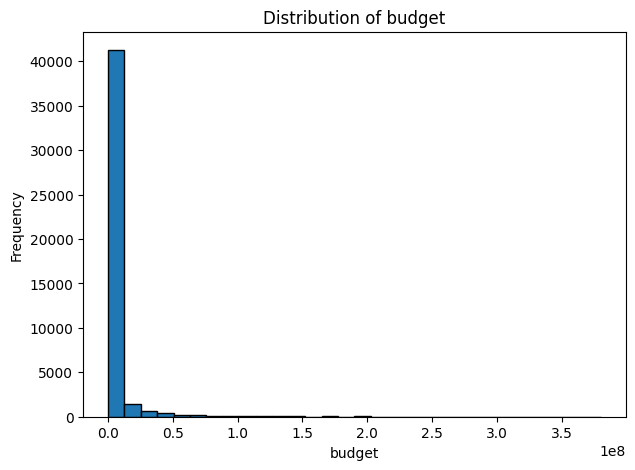

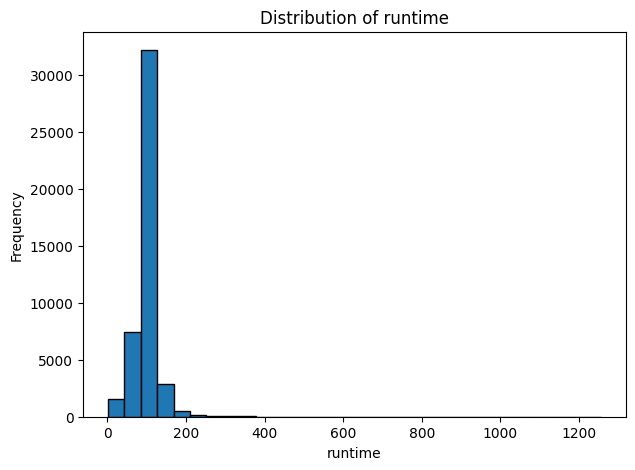

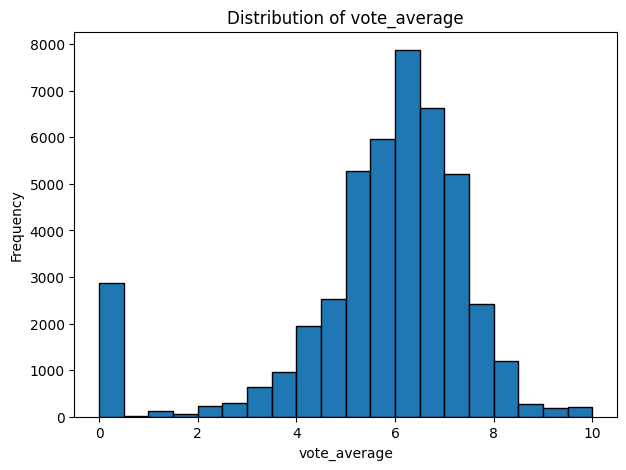

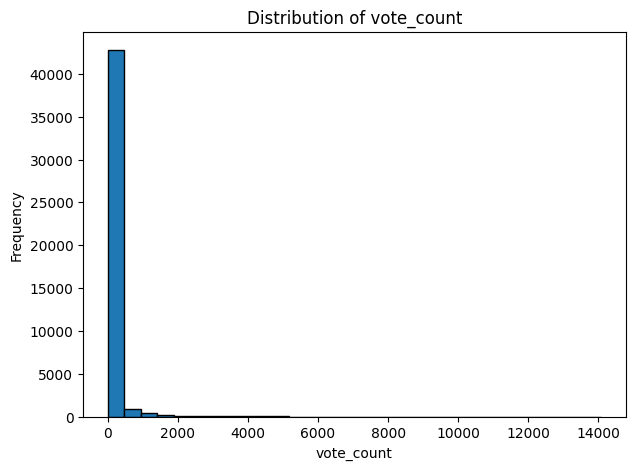

In [10]:
# ========================================
# 3. Distribution of Numeric Fields
# ========================================

# We'll plot histograms for key numeric fields 
# (e.g., budget, revenue, popularity, vote_average, vote_count, runtime)

# Each chart is separate (no subplots), as requested.
# We'll wrap them in a simple function for convenience.

def plot_hist(column, bins=30):
    plt.figure(figsize=(7,5))
    plt.hist(df[column].dropna(), bins=bins, edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_hist("budget")       # after imputation 
plot_hist("runtime")
plot_hist("vote_average", bins=20)
plot_hist("vote_count", bins=30)


Overall, these histograms confirm that **budget**, and **vote_count** are **highly skewed** toward the lower end, with a long tail of big-budget or highly popular films. Meanwhile, **vote_average** is a bit more centrally distributed around 5–6, with a noticeable spike near 0 (likely indicating either very low-rated films or entries that got imputed as 0 before the rating system fully recognized them).

Breakdown for each chart:

1. **Budget & Revenue**  
   - Both are **very heavily right-skewed**: most movies have low or moderate budgets/revenues, while a small number of blockbusters have extremely high budgets/revenues.  
   - Because you replaced zeros with NaNs and imputed them, any originally missing budget was set to the median. That’s why you still see a giant column near lower values.  
   - If you want to handle this in a model, you can consider **log-scaling** (e.g., `log1p(budget)`) to “spread out” the large values.

2. **Vote Average**  
   - Shows a near-bimodal or at least wide distribution. The main cluster is around 5–7 (a rough Gaussian shape), but there’s also a big bar at 0. Possibly these are movies with no real user ratings (leading to a default of 0) or actual extremely low-rated content.  
   - This is a good place to do further investigation: are these truly zero-rated films, or does it signify no rating data?

3. **Vote Count**  
   - Another highly skewed distribution: most movies have very few votes, while major mainstream hits can reach thousands (even 10,000+) of votes.


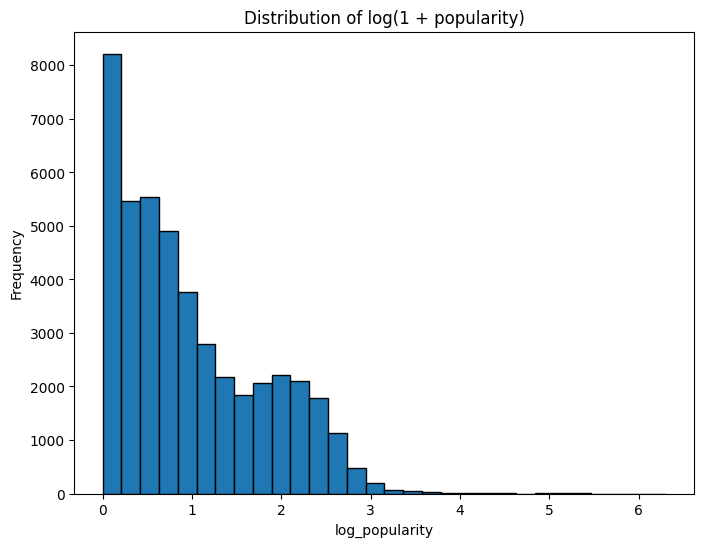

In [9]:
import numpy as np

df['log_popularity'] = np.log1p(df['popularity'])  # log(1 + x)

plt.figure(figsize=(8,6))
plt.hist(df['log_popularity'].dropna(), bins=30, edgecolor='black')
plt.title("Distribution of log(1 + popularity)")
plt.xlabel("log_popularity")
plt.ylabel("Frequency")
plt.show()


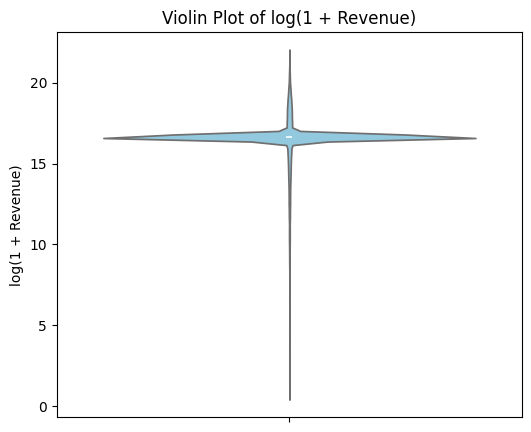

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

# Drop NaN values and apply log1p transform
log_revenue = np.log1p(df['revenue'].dropna())

sns.violinplot(y=log_revenue, color="skyblue")
plt.title("Violin Plot of log(1 + Revenue)")
plt.ylabel("log(1 + Revenue)")
plt.show()


1. Because we used log(1 + revenue), very large revenues become compressed into a smaller scale.

2. The widest part of the violin around ~15 on the y-axis indicates the most common range of log(1 + revenue) values. Exponentiating that (subtracting 1 afterwards) gives you typical revenue amounts in the 
few-million-dollar range.

3. The top whisker extends up near ~21, corresponding to exp(21) ≈ 1.3e9, i.e., over a billion in revenue (the biggest blockbusters).

4. The plot’s “thin” vertical regions (top/bottom) indicate fewer data points—i.e., not many movies reach extremely high or extremely low revenues once transformed.

5. Overall, the violin shape shows a dense cluster of moderately successful films, plus a long tail of huge moneymakers. The log transform tames extreme outliers, making the distribution more visually interpretable.

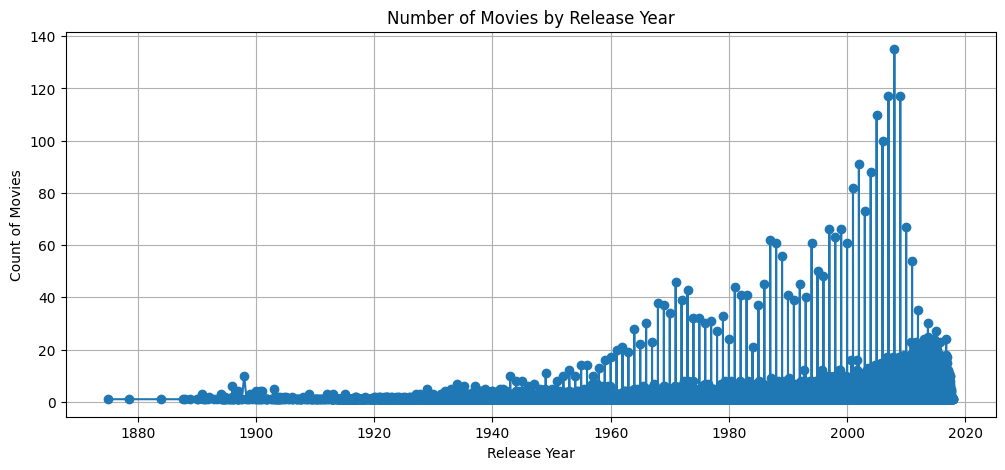

In [17]:
# ========================================
# 4. Release Year Analysis
# ========================================

import matplotlib.pyplot as plt

# Group by year, count how many movies in each year
year_counts = df['release_date'].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title("Number of Movies by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Movies")
plt.grid(True)
plt.show()



This chart shows the **number of movies (y-axis) released each year (x-axis)** according to your dataset, with a **line connecting year-by-year counts**. A few key points and why it’s important:

1. **Growth Over Time**  
   - You can see how movie production (or at least the data coverage (could be media bias)) **gradually ramps up** from the late 19th century to the mid-20th century, then **explodes** around the 1980s–2000s.  
   - This likely reflects both the **actual growth** in global film production and the **improved data collection** for newer releases.

2. **Data Coverage vs. True Production**  
   - Notice the steep **drop-off after 2020**. That might be because recent films aren’t fully captured in the dataset yet, or production slowed during events like COVID-19.  
   - Similarly, **very early films** (pre-1920) are sparse, which could be due to fewer films made back then and/or incomplete archival data in TMDb.

3. **Year-by-Year Patterns**  
   - Each spike or dip can hint at real-world factors (e.g., changes in the film industry, new streaming platforms, global events) or reflect the **dataset’s coverage bias** (which years or eras are best documented on TMDb).  

4. **Why It Matters for Our Analysis**  
   - Since we are building a **content-based recommender**, it can be helpful to see at a glance how many older vs. newer titles we have. If the bulk of our data is from, say, 1980 onward, the system might be more accurate for modern films.  
   - Identifying **incomplete coverage** in certain decades (like the 2020s) helps us manage user expectations or decide whether we could need additional data sources for the most recent releases.

Overall, the graph is crucial for **understanding temporal distribution** in the dataset—where the data is strongest, where it might be thin, and how that could impact any time-based or historical analysis (or bias) in the recommendation system.

In [20]:

# ========================================
# 5. Genre Analysis
# ========================================

# Parsing code for JSON columns
import ast

def parse_json_column(df, column):
    def try_parse(val):
        if isinstance(val, str):
            try:
                return ast.literal_eval(val)
            except:
                return []
        elif isinstance(val, list):
            return val
        return []
    df[column] = df[column].apply(try_parse)

# If you have multiple columns to parse:
json_cols = ['genres', 'keywords', 'cast', 'crew']

for col in json_cols:
    if col in df.columns:
        parse_json_column(df, col)

# Now each row in 'genres' is a list of dicts, so g.get('name') will work.


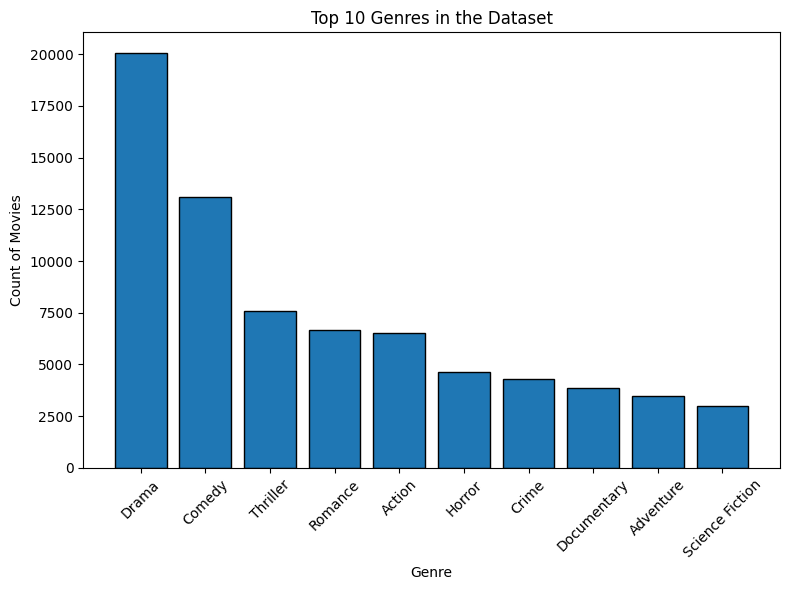

In [22]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Extract all genre names from the 'genres' column
all_genres = []
for genres_list in df['genres'].dropna():
    for g in genres_list:
        genre_name = g.get('name')
        if genre_name:
            all_genres.append(genre_name)

# This will count the frequency of each genre
genre_counts = Counter(all_genres)
top_10_genres = genre_counts.most_common(10)

# Creating a DataFrame is good for easier plotting
genres_df = pd.DataFrame(top_10_genres, columns=['genre', 'count'])

# top 10 genres
plt.figure(figsize=(8,6))
plt.bar(genres_df['genre'], genres_df['count'], edgecolor='black')
plt.title("Top 10 Genres in the Dataset")
plt.xlabel("Genre")
plt.ylabel("Count of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


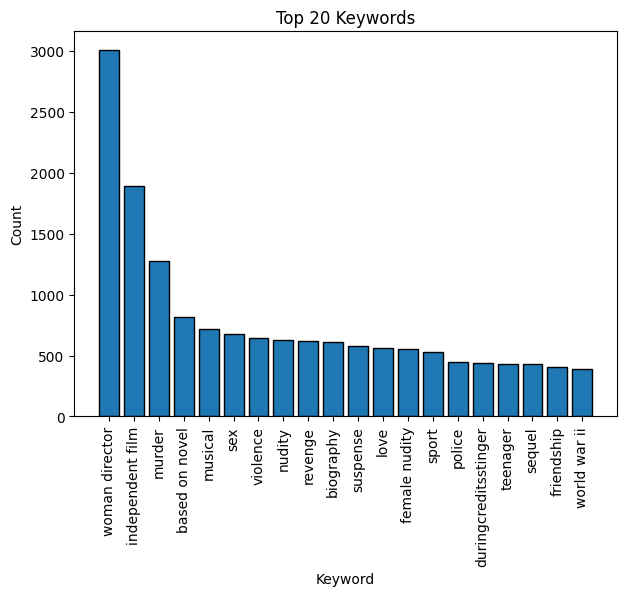

In [23]:
# ========================================
# 6. Analyzing Keywords
# ========================================

# Similar approach, but be aware: there may be MANY unique keywords.

all_keywords = []
for kw_list in df['keywords'].dropna():
    for kw_dict in kw_list:
        kw_name = kw_dict.get('name')
        if kw_name:
            all_keywords.append(kw_name)

keyword_counts = Counter(all_keywords)
top_20_keywords = keyword_counts.most_common(20)
keywords_df = pd.DataFrame(top_20_keywords, columns=['keyword', 'count'])

plt.figure(figsize=(7,5))
plt.bar(keywords_df['keyword'], keywords_df['count'], edgecolor='black')
plt.title("Top 20 Keywords")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


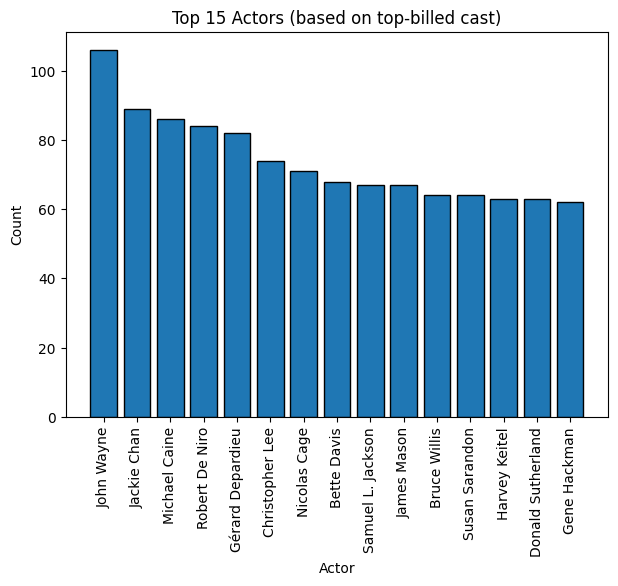

In [24]:
# ========================================
# 7. Analyzing Cast or Crew
# ========================================

# For cast, let's look at how many times each actor appears,
# but we might want to limit ourselves to top-billed cast 
# (like the first 3 or 5 in cast_list) or else some extras might overshadow.

top_billed = []
for cast_list in df['cast'].dropna():
    # cast_list is a list of dicts. We'll only consider up to first 3 cast members
    for cast_dict in cast_list[:3]:
        actor_name = cast_dict.get('name')
        if actor_name:
            top_billed.append(actor_name)

actor_counts = Counter(top_billed)
top_15_actors = actor_counts.most_common(15)
actors_df = pd.DataFrame(top_15_actors, columns=['actor', 'count'])

plt.figure(figsize=(7,5))
plt.bar(actors_df['actor'], actors_df['count'], edgecolor='black')
plt.title("Top 15 Actors (based on top-billed cast)")
plt.xlabel("Actor")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


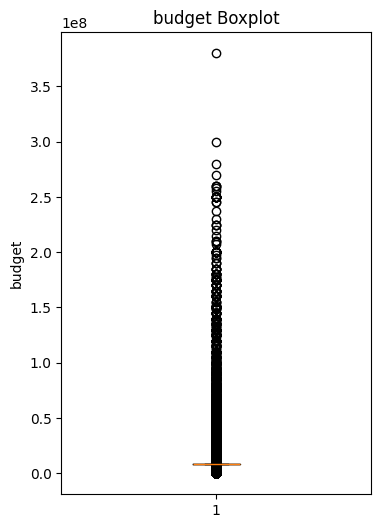

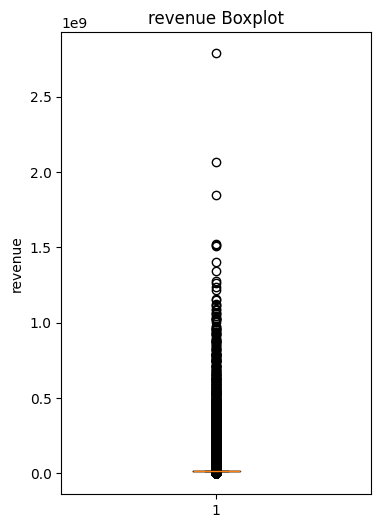

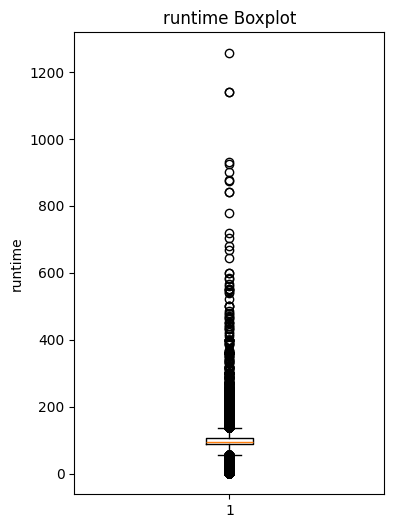

In [25]:
# ========================================
# 8. Boxplots (Single-Column)
# ========================================
# Each boxplot is separate, no subplots.

def plot_box(column):
    plt.figure(figsize=(4,6))
    plt.boxplot(df[column].dropna(), vert=True)
    plt.title(f"{column} Boxplot")
    plt.ylabel(column)
    plt.show()

plot_box("budget")
plot_box("revenue")
plot_box("runtime")


# 1. 3D Scatter Plot (Budget vs. Revenue vs. Popularity)

Subset shape: (44814, 25)


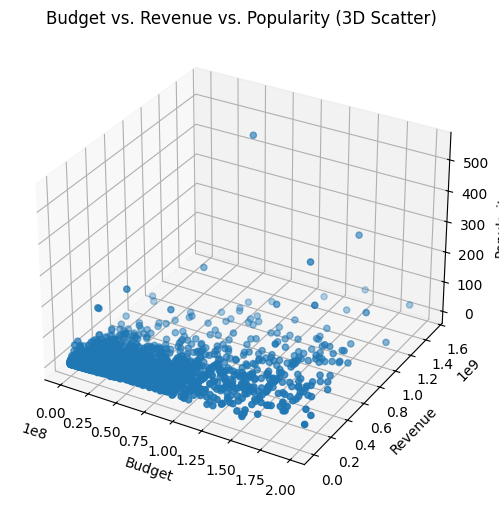

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ensures 3D projection is registered

def plot_3d_scatter(df):
    # Adjust filtering if needed to include more data points
    subset = df[(df['budget'] < 2e8) & (df['revenue'] < 2e9)]
    subset = subset.dropna(subset=['budget', 'revenue', 'popularity'])
    print("Subset shape:", subset.shape)  
    
    if subset.shape[0] == 0:
        print("No data points to plot. Consider adjusting the filter criteria.")
        return
    
    x = subset['budget']
    y = subset['revenue']
    z = subset['popularity']
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    
    ax.set_title("Budget vs. Revenue vs. Popularity (3D Scatter)")
    ax.set_xlabel("Budget")
    ax.set_ylabel("Revenue")
    ax.set_zlabel("Popularity")
    
    plt.show()

# Ensure inline plotting in a Jupyter Notebook or it literally wont show up
%matplotlib inline

plot_3d_scatter(df)


# 2. 3D Bar Chart (Top Genres by Average Vote Average, Grouped by Release Decade)

Top genres: ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror']
Decades: [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]


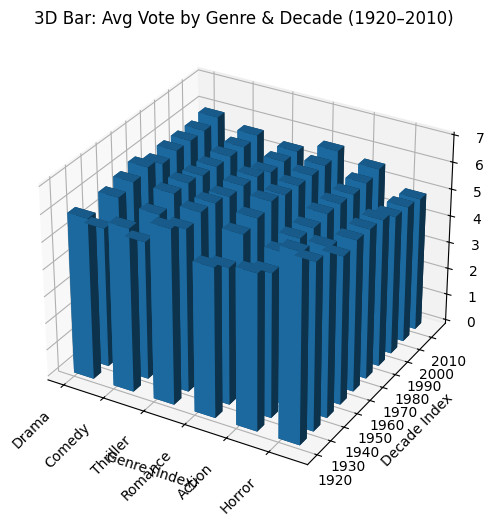

In [33]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def plot_3d_bars_genres(df):
    # 1. Create a release_decade column 
    df['release_decade'] = (df['release_date'].dt.year // 10) * 10

    # 2. Aggregate total vote_average for each (genre, decade)
    genre_decade_ratings = defaultdict(lambda: {"count": 0, "sum_rating": 0.0})
    for idx, row in df.dropna(subset=['genres', 'vote_average']).iterrows():
        decade = row['release_decade']
        for g in row['genres']:
            genre_name = g.get('name')
            if genre_name:
                genre_decade_ratings[(genre_name, decade)]['count'] += 1
                genre_decade_ratings[(genre_name, decade)]['sum_rating'] += row['vote_average']

    # 3. Compute average rating for each (genre, decade)
    avg_ratings = {}
    for (genre_name, decade), stats in genre_decade_ratings.items():
        if stats['count'] > 0:
            avg_ratings[(genre_name, decade)] = stats['sum_rating'] / stats['count']

    if not avg_ratings:
        print("No average ratings computed. Check your data!")
        return

    # 4. Identify top 6 genres overall by frequency
    from collections import Counter
    genre_counts = Counter()
    for idx, row in df.dropna(subset=['genres']).iterrows():
        for g in row['genres']:
            genre_counts[g.get('name', '')] += 1
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    top_genres = [g[0] for g in sorted_genres[:6]]

    # 5. Filter to only include 1920–2010
    decades_set = set(df['release_decade'].dropna())
    decades_set = [dec for dec in decades_set if 1920 <= dec <= 2010]
    sorted_decades = sorted(decades_set)

    if len(top_genres) == 0 or len(sorted_decades) == 0:
        print("Not enough data to generate the 3D bar chart. Check your filtering.")
        return

    print("Top genres:", top_genres)
    print("Decades:", sorted_decades)

    # 6. Prepare data for a 3d bar chart
    x_labels = top_genres
    y_labels = sorted_decades

    xpos, ypos, zpos = [], [], []
    dx, dy = 0.5, 0.5
    dz = []

    for i, genre in enumerate(x_labels):
        for j, decade in enumerate(y_labels):
            xpos.append(i)
            ypos.append(j)
            rating = avg_ratings.get((genre, decade), 0)
            dz.append(rating)

    zpos = np.zeros(len(dz))

    # 7. plot a 3d bar chart
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)

    ax.set_title("3D Bar: Avg Vote by Genre & Decade (1920–2010)")
    ax.set_xlabel("Genre (Index)")
    ax.set_ylabel("Decade Index")
    ax.set_zlabel("Average Vote")

    # 8. Label all the axes
    ax.set_xticks(range(len(x_labels)))
    ax.set_yticks(range(len(y_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha='right')
    ax.set_yticklabels(y_labels)

    plt.show()


%matplotlib inline

plot_3d_bars_genres(df)


# 3. 3D Bubble Chart (Budget vs. Runtime vs. Vote Average, with Bubble Size = Popularity)

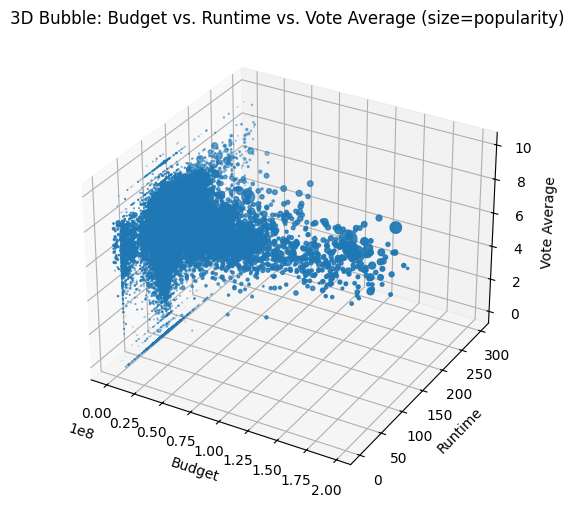

In [34]:
def plot_3d_bubble(df):
    # Filter out extreme outliers
    subset = df[(df['budget'] < 2e8) & (df['runtime'] < 300)]
    subset = subset.dropna(subset=['budget','runtime','vote_average','popularity'])

    x = subset['budget']
    y = subset['runtime']
    z = subset['vote_average']
    
    # Bubble size: scale popularity to a reasonable range
    pop_scaled = subset['popularity'] / subset['popularity'].max() * 300  # Adjust factor as needed

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    # We'll use scatter, but pass 's=pop_scaled' for bubble size
    ax.scatter(x, y, z, s=pop_scaled)

    ax.set_title("3D Bubble: Budget vs. Runtime vs. Vote Average (size=popularity)")
    ax.set_xlabel("Budget")
    ax.set_ylabel("Runtime")
    ax.set_zlabel("Vote Average")

    plt.show()

%matplotlib inline
plot_3d_bubble(df)


## 1. Distributions & Basic Summaries

1. **Vote Average**  
   - The histogram of `vote_average` shows a near-bell-shaped curve centered around 5–6. A small tail extends toward 10, this means a minority of films achieve exceptionally high ratings.  
   - Very few movies have an average rating near 0, which likely includes unrated or really badly received titles.

2. **Popularity**  
   - After taking the log of `1 + popularity`, we see a heavily skewed distribution. Many titles have very low popularity (which is interesting to note), while a few “blockbuster” outliers push the upper tail above 5.0 in log scale.  
   - This is really indicative that popularity is dominated by a handful of exceptionally well-known films. << thats the bias>>

3. **Revenue**  
   - In the violin plot of `log(1 + revenue)`, we see a wide spread, with a cluster around moderate revenues and a long tail of major box-office hits. Some extreme outliers extend the distribution above 20 in log scale, representing the highest-earning blockbusters.

4. **Release Year**  
   - The count of movies by release year spikes dramatically from the 1980s onward, peaking around the early 2000s. Older decades (e.g., 1920s, 1930s) show far fewer films in our dataset, this could reflect missing historical data, but its far more likely its simply fewer films produced at the time.

5. **Genres, Keywords, & Actors**  
   - **Top 10 Genres**: Drama and Comedy lead the pack, followed by Thriller, Romance, Action, Horror, Crime, Documentary, Adventure, and Science Fiction. Drama alone accounts for nearly 20,000 entries, underscoring its dominance.  
   - **Top 20 Keywords**: “woman director,” “independent film,” and “murder” are the three most frequent, indicating that many films in our dataset either highlight female-directed projects, are low-budget/indie productions, or revolve around crime/mystery elements.  This is very note worthy!
   - **Top 15 Actors (based on top-billed cast)**: John Wayne, Jackie Chan, and Michael Caine top the list, reflecting prolific filmographies. Robert De Niro, Gérard Depardieu, and Nicolas Cage also feature prominently.

6. **Boxplots (Budget, Revenue, Runtime)**  
   - All three show strong skewness, with a mass of data points near the lower end and long tails of outliers. Budgets can exceed \$300 million, revenues can top \$1 billion, and runtimes can surpass 200 minutes, but these are rare extremes.

7. **Numeric Summary & Correlation**  
   - **Budget & Revenue** correlate strongly (r ≈ 0.75). High budgets generally accompany higher revenues, though many smaller-budget films also earn modest revenues.  
   - **Vote Count & Revenue** also show a strong relationship (r ≈ 0.80), suggesting that widely seen and heavily voted-on films tend to make more money.  
   - **Vote Average** is only weakly correlated with budget or revenue, implying that bigger production scale doesn’t necessarily guarantee higher critical or audience ratings.

---

## 2. Advanced 3D Visualizations

1. **Budget vs. Revenue vs. Popularity (3D Scatter)**  
   - This chart confirms that big-budget films often pull in large revenues which achieve higher popularity scores. However, we see a dense cloud of smaller productions in the lower-left corner, many of which generate modest returns and remain less popular.

2. **Budget vs. Runtime vs. Vote Average (Bubble Chart, Size = Popularity)**  
   - We observe that a moderate runtime (somewhere between 80–120 minutes) spans a wide range of budgets. Vote average doesn’t appear strictly tied to runtime, but extremely high-budget films do appear in the upper-left region, often with higher popularity (larger bubbles).  
   - A few outliers show extremely long runtimes above 200 minutes, though these are relatively rare.

3. **Avg Vote by Genre & Decade (1920–2010) (3D Bar)**  
   - We focused on the top 6 genres (Drama, Comedy, Thriller, Romance, Action, Horror) across ten decades (1920s–2010s). Overall, the average ratings hover between 5 and 7.  
   - Some genres (e.g., Drama, Thriller) consistently maintain average votes in the mid-to-high 6 range, while others (like Horror) show slightly lower average ratings in certain decades.  
   - The 2000s and 2010s have more data points overall, reflecting the modern era’s proliferation of films.

---

## 3. Key Takeaways

1. **Financials & Scale**  
   - Budget and revenue are highly skewed. The strong correlation between them suggests that, while big budgets can lead to big box-office takes, many smaller films also populate the dataset.  
   - Popularity and vote count correlate with revenue, indicating commercial hits tend to draw bigger audiences and more user ratings.

2. **Audience Reception**  
   - The average rating (vote_average) typically sits around 5–6, with fewer films earning extreme highs (9–10) or lows (below 2).  
   - Genre and era play a role in how films are rated, with Drama and Thriller often seeing higher average scores.

3. **Temporal Trends**  
   - Movie production and data availability surge from the 1980s onward. Decade-based analysis (1920–2010) shows relatively stable average ratings but changing genre popularity over time.

4. **Diversity of Data**  
   - The presence of many missing values (especially for budget and revenue) required imputation. Our correlation matrix confirms that missing indicators are negatively related to the actual numeric fields, reinforcing that unreported budgets and revenues tend to be lower in real-world scenarios.

---

## 4. Next Steps

- **Feature Engineering**: We can transform these insights into features for a content-based or hybrid recommendation system. For instance, we might incorporate genre embeddings, textual analysis of keywords, or time-based weighting for popularity.  
- **Modeling**: Our neural network approach can leverage numeric columns (budget, popularity, runtime) and derived textual features (genres, keywords, cast) to recommend movies with similar profiles or high expected user ratings.  
- **Refined Filtering**: We could remove extreme outliers (e.g., top 1% budgets/revenues) if they distort training or focus only on certain decades or genres for specialized recommendations.
